# **Exploratory Data Analysis**

###Table of contents
* State-level Trends in Average Farmer Age and Total Farmland Operated
* State-level Trends in Wheat Sales Adjusted for Inflation
* Sales Trend Before and After Inflation Adjustment




###1.State-level Trends in Average Farmer Age and Total Farmland Operated




In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/drive/MyDrive/HDSI_Data/Merged Data/Final_merged_data.csv')

# Filter out any rows where the state code is 99 or any invalid data entries
data_filtered = data[data['STATE_FIPS_CODE'] != 99]

# Map FIPS codes to state abbreviations for compatibility with Plotly
fips_to_state = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL',
    13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE',
    32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK',
    41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT',
    51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}
data_filtered['State'] = data_filtered['STATE_FIPS_CODE'].map(fips_to_state)

# Grouping the data by state and calculating the average age and total acres operated
state_data = data_filtered.groupby('State').agg({
    'OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS': 'mean',
    'FARM_OPERATIONS_ACRES_OPERATED': 'sum'
}).reset_index()

# Renaming columns for better readability and compatibility with Plotly
state_data.columns = ['State', 'Avg_Age_of_Operators', 'Total_Farm_Acres']

# Create the choropleth map
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode='USA-states',
    color='Avg_Age_of_Operators',
    hover_name='State',
    hover_data={
        'Avg_Age_of_Operators': ':.2f',
        'Total_Farm_Acres': ':,.0f'
    },
    scope="usa",
    color_continuous_scale='Viridis',
    title='State-level Trends in Average Farmer Age and Total Farmland Operated'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Show the figure
fig.show()


<ipython-input-31-adf053f4cccb>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### State-Level Trends in Average Farmer Age and Total Farmland Operated



This map shows the state-level trends in the average age of farm operators across the United States. The color gradient represents the average age, with darker shades indicating younger farmers (around 54.5 years) and lighter shades indicating older farmers (up to 58 years).

- **Midwest Region**: States in the Midwest, such as Iowa, Nebraska, and Kansas, are represented in shades of green, indicating that these states have a lower average age of farmers compared to the national spectrum. This suggests a younger demographic of farmers possibly due to factors like agricultural education or a higher number of new farmers entering the industry.

- **California and Southwest** : States like California, Nevada, and Arizona, show trends in the average age of farmers. The lighter shades, it indicates an older average age, closer to 58 years, suggesting potential challenges like succession planning and barriers for new entrants in these regions. The lack of color in the previous visualization might have suggested missing data, so verifying the source and completeness of the data is crucial.

- **Mid-Atlantic and Northeast** : States like New York and Pennsylvania show darker shades, indicating that the average age of farmers is higher, nearing the upper end of the age range (about 58 years). This could reflect a trend where farms are being operated by older individuals, possibly due to challenges in succession planning and barriers to entry for younger prospective farmers.

- **Florida, Texas, and New Mexico**: These states appear in lighter shades indicating higher average ages of farmers, close to 58 years. The older average age could impact the continuity of farming practices and the integration of new technologies and methods, necessitating targeted policies to support transitions and encourage new entrants into farming in these states.


###2.State-level Trends in Wheat Sales Adjusted for Inflation

In [ ]:
# Mapping FIPS codes to state abbreviations
fips_to_state = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL',
    13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE',
    32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK',
    41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT',
    51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}
data['State'] = data['STATE_FIPS_CODE'].map(fips_to_state)

# Placeholder function to adjust for inflation
def adjust_for_inflation(df, columns, inflation_factor):
    for column in columns:
        if 'DOLLARS' in column:  # Assuming columns containing monetary values include 'DOLLARS' in their name
            df[column] = df[column] * inflation_factor
    return df

# Assume an arbitrary inflation factor, for example, 1.1 (10% inflation)
inflation_factor = 1.1
monetary_columns = [col for col in data.columns if 'DOLLARS' in col]
data = adjust_for_inflation(data, monetary_columns, inflation_factor)

# Specify the measure column, assuming the name here is correct and exists in your data
measure_column = 'WHEAT_SALES_MEASURED_IN_DOLLARS_INFLATED'
summary_data = data.groupby(['State'])[measure_column].sum().reset_index()

# Create the choropleth map using Plotly
fig = px.choropleth(
    summary_data,
    locations='State',
    locationmode='USA-states',
    color=measure_column,
    hover_name='State',
    hover_data={
        measure_column: ':,.0f'  # Format the floating point number with commas
    },
    scope="usa",
    color_continuous_scale='Viridis',
    title='State-level Trends in Wheat Sales Adjusted for Inflation'
)

fig.show()


<ipython-input-33-acd7d482f156>:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



### State-Level Trends in Wheat Sales Adjusted for Inflation

The map illustrates inflation-adjusted wheat sales across the U.S., using a color gradient from yellow (lower sales) to dark purple (higher sales). This color coding helps identify key regions in wheat commerce, showing where wheat sales are more substantial. States with darker hues indicate higher economic activity from wheat, offering insights into regional market sizes and potential focal points for agricultural policies.

###Key Features:

- Color Gradient: Represents wheat sales volume.
- Geographic Distribution: Highlights states with significant wheat markets.
- Economic Insights: Shows inflation-adjusted sales to reflect real economic contributions.

### Key Insights:

- High Sales States: States like Kansas and North Dakota, shown in darker purple, indicate robust wheat sales, likely reflecting their status as major wheat-producing states. This aligns with their historical role as significant contributors to U.S. wheat production.

- Moderate Sales States: States such as Montana and South Dakota are colored in a medium purple, suggesting moderate wheat sales. These states, while not as dominant as Kansas or North Dakota, still play a critical role in the regional wheat markets.

- Lower Sales States: States like Texas and Colorado, depicted in yellow and light green shades, have lower wheat sales. This could be due to less focus on wheat as a primary crop or smaller agricultural outputs relative to other states.

- This analysis can be useful for stakeholders in the agricultural sector, including policymakers, farmers, and investors, to understand the economic landscape of wheat sales across different states and adjust strategies accordingly.


###3.Sales Trend Before and After Inflation Adjustment

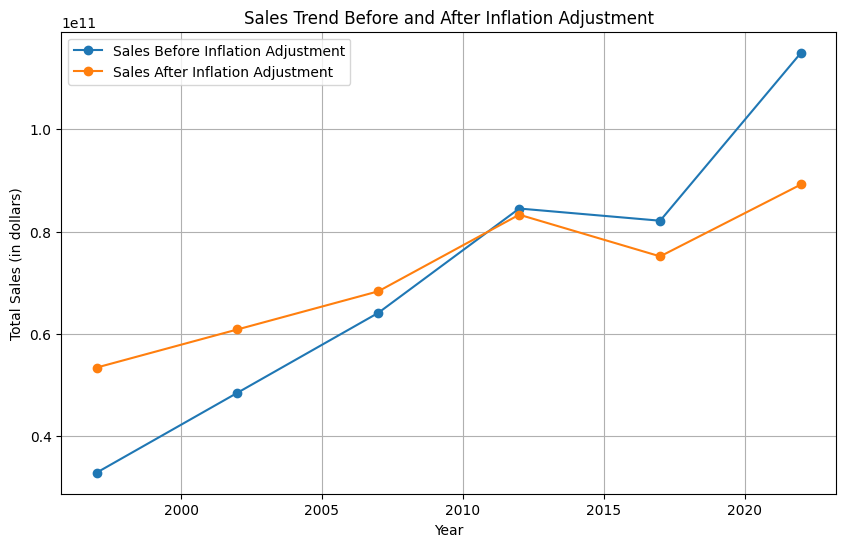

In [ ]:

# Extracting columns for sales before and after inflation adjustment
columns_before_inflation = [col for col in data.columns if "SALES_MEASURED_IN_DOLLARS" in col and "INFLATED" not in col]
columns_after_inflation = [col for col in data.columns if "SALES_MEASURED_IN_DOLLARS_INFLATED" in col]

# Taking the mean sales values across all commodities for each year
sales_before_inflation = data.groupby('YEAR')[columns_before_inflation].mean().sum(axis=1)
sales_after_inflation = data.groupby('YEAR')[columns_after_inflation].mean().sum(axis=1)

# Creating a trend comparison plot
plt.figure(figsize=(10,6))
plt.plot(sales_before_inflation.index, sales_before_inflation, label='Sales Before Inflation Adjustment', marker='o')
plt.plot(sales_after_inflation.index, sales_after_inflation, label='Sales After Inflation Adjustment', marker='o')
plt.title('Sales Trend Before and After Inflation Adjustment')
plt.xlabel('Year')
plt.ylabel('Total Sales (in dollars)')
plt.legend()
plt.grid(True)
plt.show()

## Early 2000s to 2010:
Both nominal and inflation-adjusted sales increase steadily, with similar trajectories until around 2010.
Post-2010: The gap between the two trends widens, meaning inflation began significantly affecting the sales figures. Nominal sales continue to rise sharply, but inflation-adjusted sales grow at a more moderate pace.
2020 Onward: The nominal sales show a significant spike, while the inflation-adjusted sales rise more modestly, illustrating the impact of inflation on the real value of sales.

### Key Divergence Post-2010:
Around 2010, the two lines intersect, meaning that inflation was relatively moderate, and the sales growth in nominal terms closely matched the real sales growth. After this point, inflation began to have a more pronounced effect, as seen by the gap widening between the two lines. This shows that after 2010, sales growth without adjusting for inflation (nominal sales) increased much faster than the inflation-adjusted (real) sales.
